In [4]:
import re
import seaborn as sns

### 1

In [6]:
pattern = re.compile(r'ftp.*?gz')
input = open("./references.txt", "r")
output = open("./ftps", "w")
string  = input.readline()
while string:
    ftps = pattern.findall(string)
    for ftp in ftps:
        output.write(ftp)
        output.write("\n")
    string = input.readline()
input.close()
output.close()


### 2, 3, 4

In [120]:
input = open("./2430AD.txt", "r")
line = input.readline()
digit_pattern = re.compile(r"\d")   #все цифры
a_pattern = re.compile(r"[a-zA-Z]*[a|A][a-zA-Z]*")  #все буквы а
express_pattern = re.compile(r"[\'\"]?[A-Z][^\.\?\;]*?[!][\'\"]?")  #все восклицательные предложения
all_digits = []
all_a = []
express_sent = []
while line:
    cur_digits = digit_pattern.findall(line)
    cur_a = a_pattern.findall(line)
    cur_expr = express_pattern.findall(line)
    all_digits.extend(cur_digits)
    express_sent.extend(cur_expr)
    all_a.extend(cur_a)
    line = input.readline()
input.close()

In [383]:
print(f"all_digits - {all_digits}", f'all_a - {all_a}', f'express_sent - {express_sent}', sep = '\n')

all_digits - ['2', '4', '3', '0', '1', '9', '6', '9', '2', '4', '3', '0', '2', '4', '3', '0', '5', '7', '5', '7', '1', '9', '7', '0', '3', '6', '8', '3', '5', '4', '6', '0', '2', '4', '3', '0']
all_a - ['A', 'and', 'dawn', 'and', 'all', 'ache', 'have', 'a', 'nightmare', 'a', 'are', 'all', 'and', 'a', 'gleam', 'anywhere', 'an', 'original', 'a', 'personality', 'packed', 'talk', 'said', 'Alvarez', 'said', 'Social', 'eventually', 'An', 'character', 'escaped', 'adjustment', 'talking', 'irritates', 'past', 'tact', 'along', 'Trail', 'was', 'as', 'always', 'sparsely', 'have', 'taken', 'and', 'Alvarez', 'walking', 'Alvarez', 'was', 'tall', 'and', 'rather', 'athletic', 'a', 'muscular', 'activities', 'stairs', 'and', 'rampways', 'instance', 'almost', 'an', 'character', 'and', 'avoided', 'sunlamps', 'and', 'was', 'pale', 'said', 'want', 'can', 'have', 'square', 'space', 'and', 'has', 'apartment', 'Rather', 'a', 'a', 'way', 'said', 'Alvarez', 'And', 'a', 'Alvarez', 'added', 'matter', 'reach', 'peak

Имеет ли смысл вообще выгружать по одной строчке?

#### 5


In [8]:
input = open("./2430AD.txt", "r")
data = input.read()
distrib_word = {}
for i in range(1, 21):  # верхняя граница длины слова установим 20
    pat = r'\b[a-z]' + '{' + f'{i}' + '}' + r'[a-z]\b'    # не понял как оптимально сконектить f и r строку, поэтому просто скантатил
    match = re.findall(pat, data, flags=re.IGNORECASE)  #матчим все слова игнорируя регистр
    unique_words = set([i.lower() for i in match]) #преобразуем все слова к нижнему регистру, и оставим уникальные c помощью set
    if len(unique_words) == 0:  #когда достигнем нулевого кол-ва слов длины i, остановимся
        break
    else:
        distrib_word[i] = len(unique_words)
input.close()

In [9]:
for key in distrib_word:
    distrib_word[key] = (distrib_word[key]/sum(distrib_word.values())) * 100


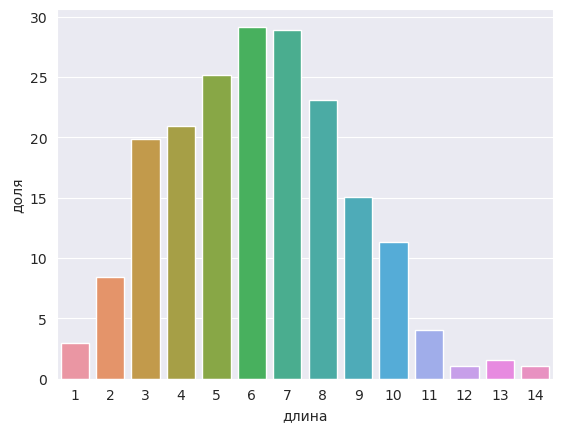

In [13]:
#penguins = sns.load_dataset("penguins")
ax = sns.barplot(x = list(distrib_word.keys()), y = list(distrib_word.values()));
ax.set(xlabel='длина', ylabel='доля');

#### 6

In [499]:
def translate_to_kirpich(text):
    all_words = re.findall(r'[\w]+', text)  #извлечем все слова из текста
    vowel_pattern = re.compile(r'[а|я|у|ю|о|е|ё|э|и|ы]', flags=re.IGNORECASE)   #патерн для поиска всех гласных в слове
    output = []
    for word in all_words:  #будем обрабатывать каждое слово
        all_match = set(vowel_pattern.findall(word))    # нашли все гласные в слове, повторения гласных не интересуют, сделаем set
        for i in all_match:
            word = re.sub(i, i+'k'+i, word)     # последовательно делаем замену гласного i на iki в слове
        output.append(word)
    output = ' '.join(output)
    return output



Проверка

In [502]:
translate_to_kirpich('жЕлЕзО надо ковать прямо сейчас')

'жЕkЕлЕkЕзОkО наkадоkо коkоваkать пряkямоkо сеkейчаkас'

#### 7

In [415]:
def find_n_words_sentences(text, n):
    get_sent = r'[A-Z][^\.!?]*?[\.|!|?]'
    all_sent = re.findall(get_sent, text)
    extract_word = re.compile(r'[\w]+')
    ans = []
    for sent in all_sent:
        all_words = extract_word.findall(sent)
        all_words = tuple(all_words)
        if len(all_words) == n:
            ans.append(all_words)
    return ans



Проверка

In [416]:
input = open('./2430AD.txt')
data = input.read()

In [417]:
find_n_words_sentences(data, 10)

[('There',
  'was',
  'a',
  'fugitive',
  'whiff',
  'of',
  'plankton',
  'in',
  'its',
  'varieties'),
 ('Cranwitz',
  'closed',
  'the',
  'door',
  'behind',
  'them',
  'and',
  'they',
  'sat',
  'down'),
 ('There',
  'is',
  'a',
  'contract',
  'with',
  'the',
  'government',
  'of',
  'long',
  'standing'),
 ('Cranwitz',
  'said',
  'The',
  'good',
  'of',
  'being',
  'there',
  'to',
  'look',
  'at'),
 ('Social',
  'pressure',
  'We',
  'couldn',
  't',
  'persuade',
  'people',
  'against',
  'real',
  'resistance'),
 ('He',
  'll',
  'want',
  'other',
  'species',
  'in',
  'these',
  'new',
  'empty',
  'worlds'),
 ('Bunting',
  'said',
  'What',
  'other',
  'worlds',
  'are',
  'we',
  'going',
  'to',
  'colonize'),
 ('Sure',
  'and',
  'we',
  'established',
  'a',
  'colony',
  'and',
  'we',
  'abandoned',
  'it'),
 ('Even',
  'if',
  'it',
  'meant',
  'killing',
  'off',
  'all',
  'other',
  'animal',
  'life'),
 ('The',
  'toleosts',
  'replaced',
  'the',